# Imports

In [1]:
import IPython
from IPython.display import HTML

import numpy as np
import scipy
import soundfile as sf
from matplotlib import pyplot as plt
from matplotlib import animation

# Utils

In [15]:
# Settings for plotting
FIGURE_SIZE = (10, 6)
plt.rcParams['figure.figsize'] = FIGURE_SIZE

MOVE_RESOLUTION = 1

In [3]:
# Save the audio np array to a wav file tmp.wav
def SavePreviewAudio(audio):
    sf.write('tmp.wav', audio, 44100)

# Read In Data

- Change the path of TARGET_AUDIO_PATH to the path of the audio file you want to label.

In [4]:
# Target sound file for label generation
TARGET_AUDIO_FILE = "data/acrocephalus-palustris-sample.wav"

In [5]:
# Read target sound file
soundData, sampleRate = sf.read(TARGET_AUDIO_FILE)

print(f"Data size: {len(soundData)}\nSample rate: {sampleRate}")
# Save the preview audio
SavePreviewAudio(soundData)

Data size: 20400692
Sample rate: 44100


In [6]:
# Get the spectrogram of the soundData
sampleFreq, segTime, soundSpect = scipy.signal.spectrogram(soundData, fs=sampleRate)

# Scale the spectrogram to 0-1
soundSpect = soundSpect / soundSpect.max()

len(sampleFreq), len(segTime), soundSpect.shape

(129, 91074, (129, 91074))

In [32]:
# Get the start and end time in seconds from user input
startTime = float(input("Enter start time in seconds: "))
endTime = float(input("Enter end time in seconds: "))
# If start time < 0, set it to 0
if startTime < 0:
    startTime = 0
# If end time > length of sound, set it to length of sound
if endTime > len(soundData)/sampleRate:
    endTime = len(soundData)/sampleRate

# Get the start and end index in the spectrogram
startIndex = 0
for i in range(len(segTime)):
    if segTime[i] >= startTime:
        startIndex = i
        break
endIndex = 0
for i in range(len(segTime)):
    if segTime[i] >= endTime:
        endIndex = i
        break

# Get the sub-sound data
subSoundData = soundData[int(startTime*sampleRate):int(endTime*sampleRate)]
# Get the sub-spectrogram of the soundData
subSoundSpect = soundSpect[:, startIndex:endIndex]

SavePreviewAudio(subSoundData)

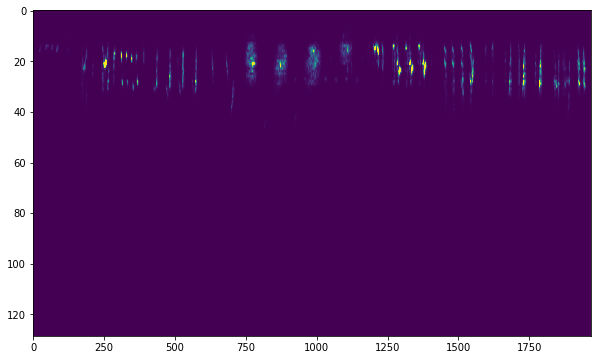

In [35]:
fig, ax = plt.subplots()
ax.imshow(subSoundSpect*20, aspect='auto', vmin=0, vmax=1)

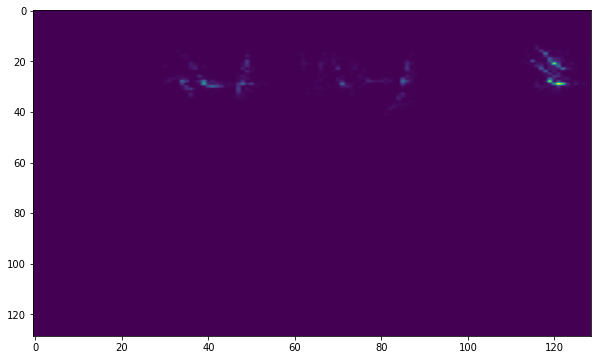

In [24]:
fig, ax = plt.subplots()
im = ax.imshow(subSoundSpect, aspect='auto')

def SpectAnim(frameNum):
    # Get current frame window
    frameWidth = int(subSoundSpect.shape[0])
    frameStart = int(frameWidth/MOVE_RESOLUTION * frameNum)
    frameEnd = min(
        frameStart + frameWidth,
        subSoundSpect.shape[1]
    )
    
    ax.cla()
    ax.imshow(subSoundSpect[:, frameStart:frameEnd], aspect='auto')
    # im.set_array(subSoundSpect[:, frameStart:frameEnd])
    
    return [im]

anim = animation.FuncAnimation(fig, SpectAnim, frames=int(MOVE_RESOLUTION*subSoundSpect.shape[1]/subSoundSpect.shape[0]), interval=1000)

HTML(anim.to_jshtml())